In [33]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [22]:
dataset = pd.read_csv("iris.csv")
print(dataset.head(7))

   5.1  3.5  1.4  0.2  setosa
0  4.9  3.0  1.4  0.2  setosa
1  4.7  3.2  1.3  0.2  setosa
2  4.6  3.1  1.5  0.2  setosa
3  5.0  3.6  1.4  0.2  setosa
4  5.4  3.9  1.7  0.4  setosa
5  4.6  3.4  1.4  0.3  setosa
6  5.0  3.4  1.5  0.2  setosa


In [15]:
dataset.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
print(dataset.shape)

(149, 5)


In [30]:
#print(dataset.groupby('class').size())

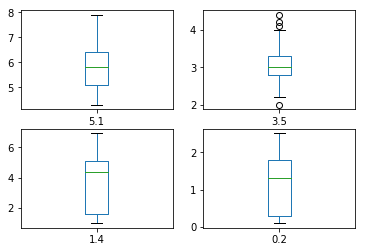

In [39]:
#Univarient plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

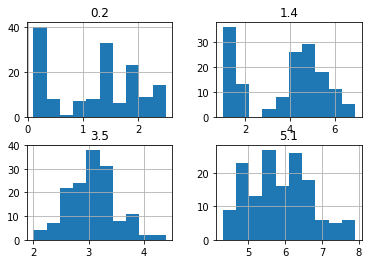

In [40]:
#histrogram
dataset.hist()
plt.show()

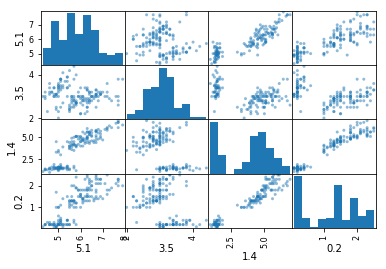

In [43]:
#multi varient plot
scatter_matrix(dataset)
plt.show()

In [49]:
# Split-out validation dataset

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)

In [50]:
#test options and eveatiaoon matrix
seed = 7
scoring = 'accuracy'

In [56]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.055277)
LDA: 0.983333 (0.033333)
KNN: 0.975000 (0.053359)
CART: 0.966667 (0.055277)
NB: 0.950000 (0.040825)
SVM: 0.983333 (0.033333)


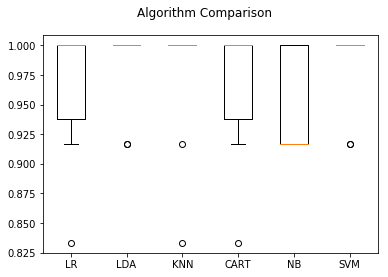

In [59]:
#compare algoritham
fig =plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
#make prediction on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions =knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))




0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.92      0.92      0.92        12
  virginica       0.91      0.91      0.91        11

avg / total       0.93      0.93      0.93        30

